# Import libraries

In [14]:
from format_tree import plot_formatted_tree, get_nulls_in_leaf_nodes, summarize_tree, convert_text_to_number_column
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


# Example - plot trees

Total training samples: 150


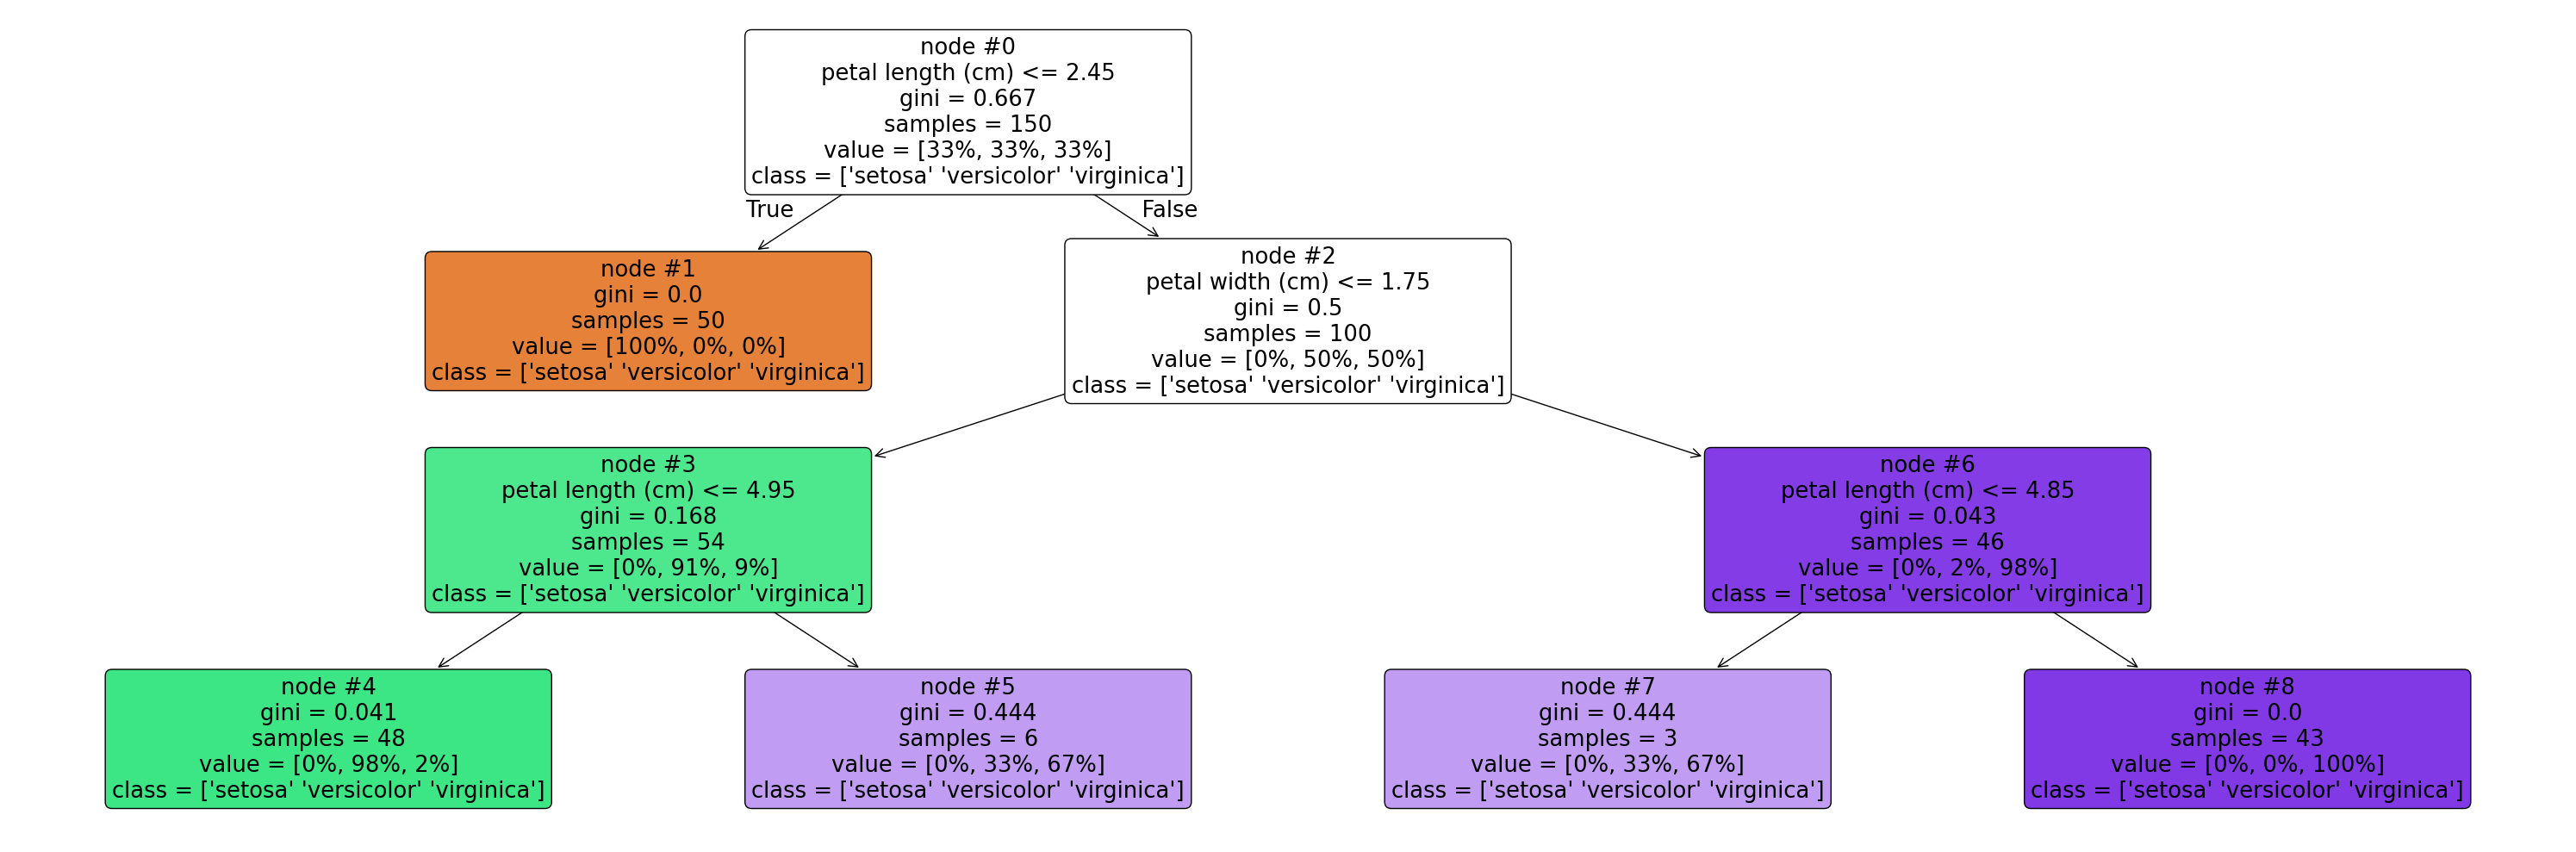

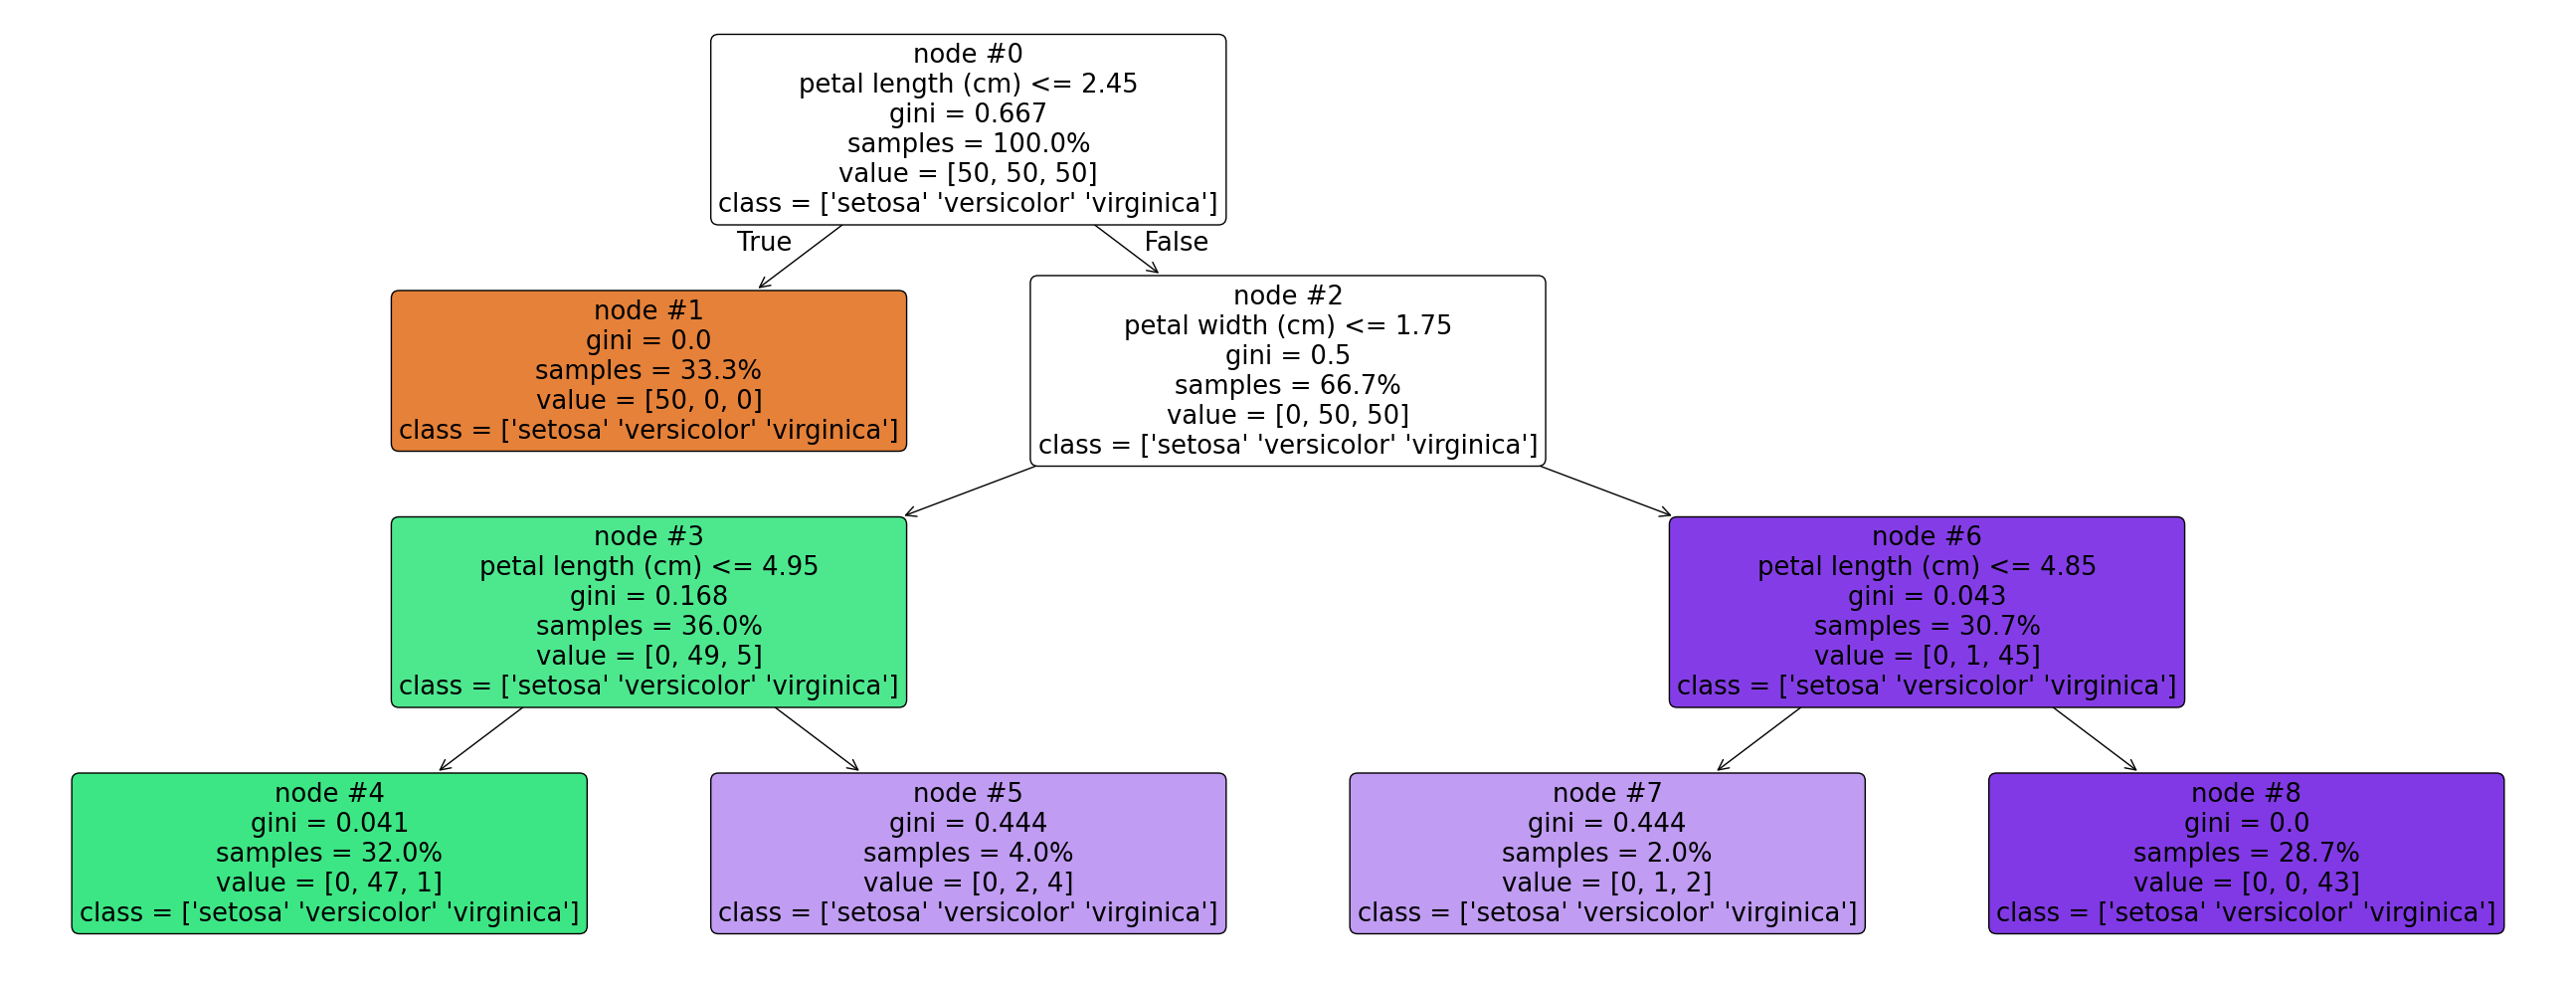

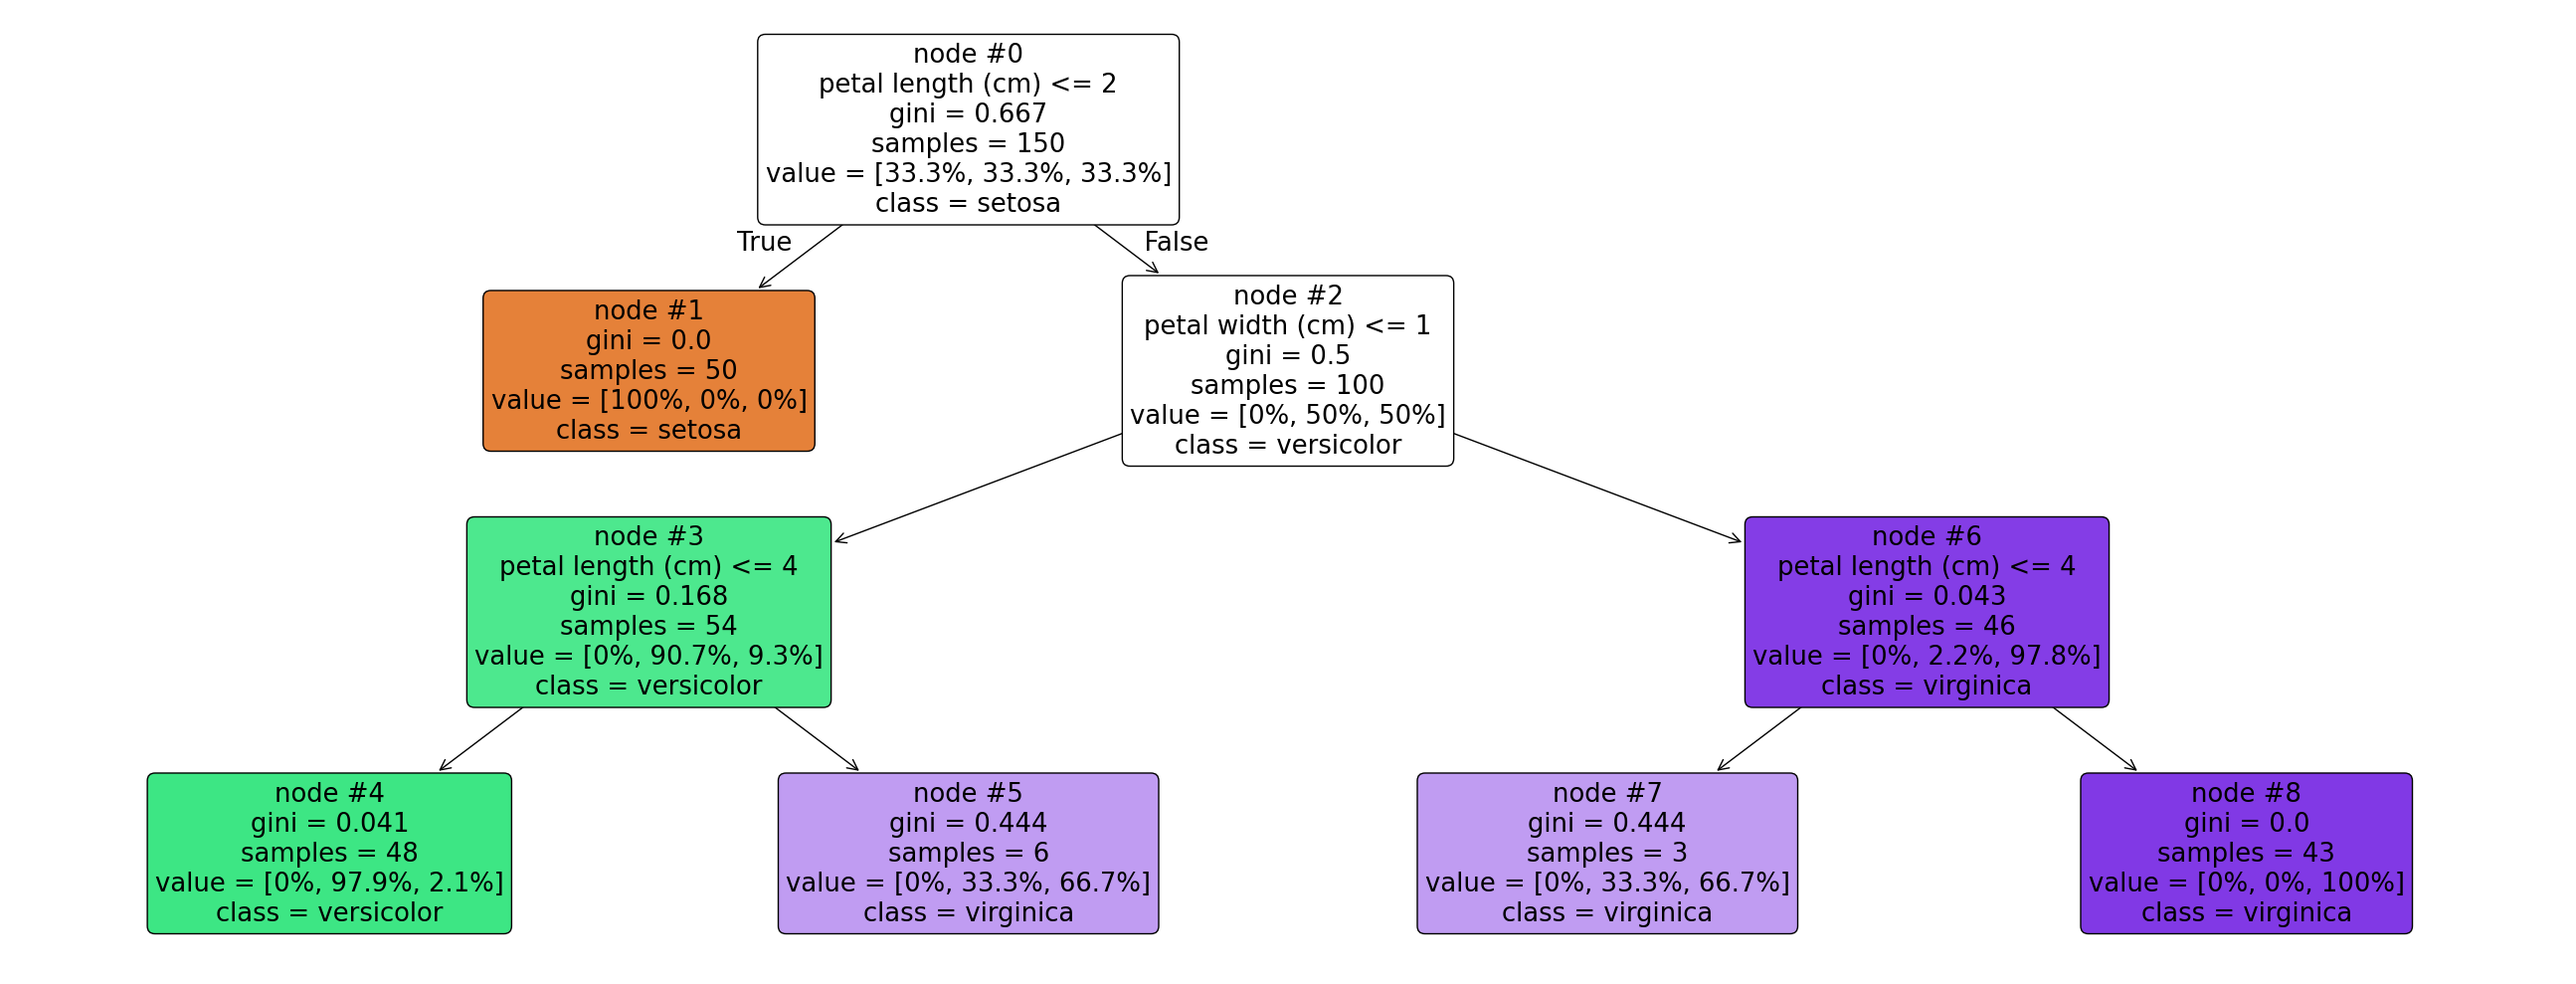

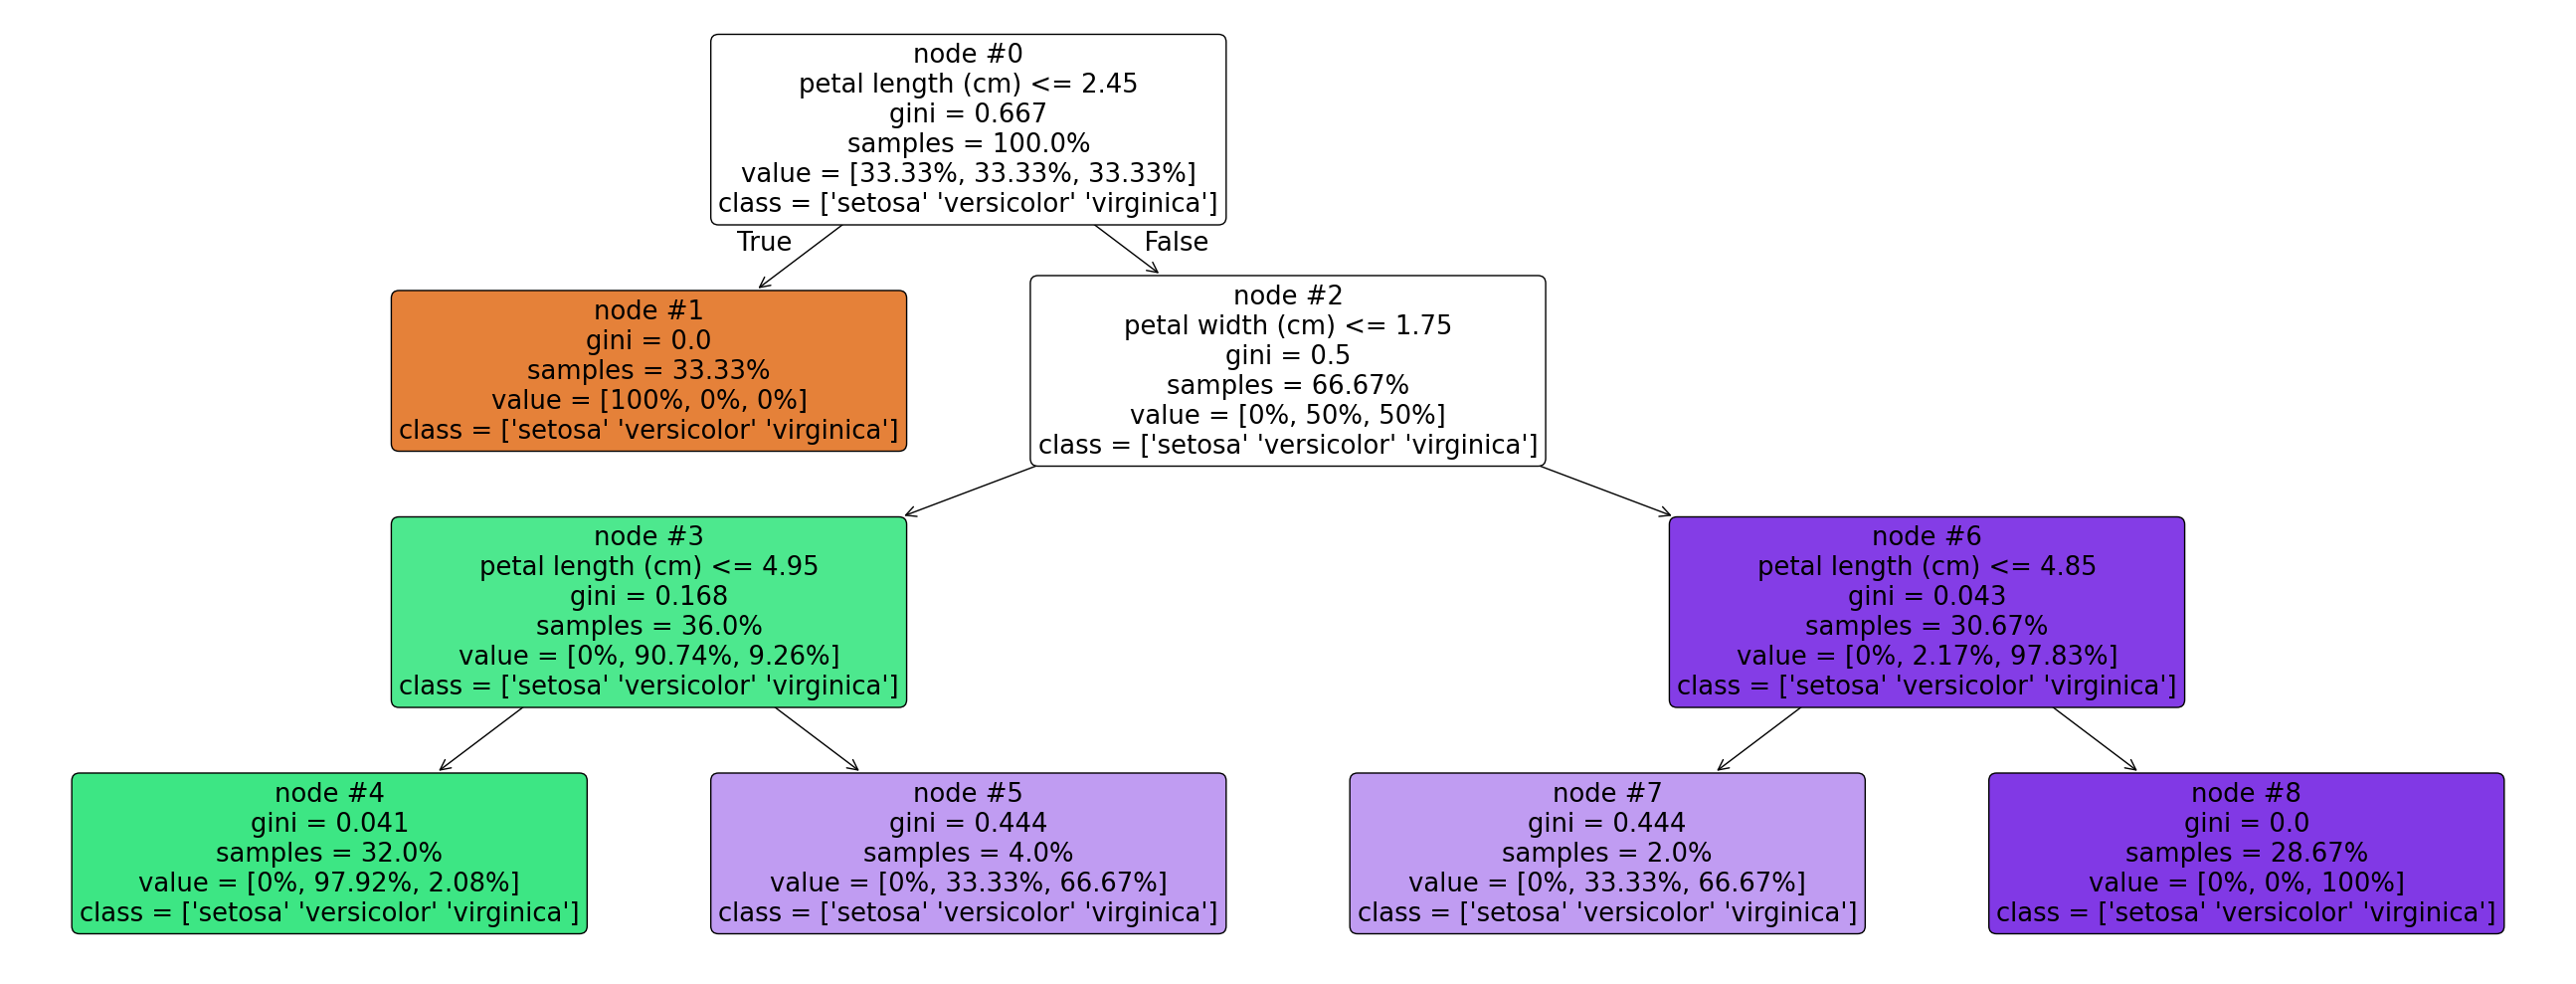

In [15]:
# Usage example
def example():
    
    # Load dataset
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    # Train a decision tree
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X, y)
    
    # Get total training sample size
    total_samples = int(clf.tree_.n_node_samples[0])
    print("Total training samples:", total_samples)
    
    # Example 1: Default - values as percentages, samples as numbers
    fig1, ax1 = plot_formatted_tree(
        clf,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        samples_format="number",
        value_format="percentage",
        max_decimal_places=0,  # Show 0 decimal places
        figsize=(30, 10),
        display_missing=False
    )
    # fig1.savefig('tree_default.png')
    
    # Example 2: Values as numbers, samples as percentages
    fig2, ax2 = plot_formatted_tree(
        clf,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        samples_format="percentage",
        value_format="number",
        figsize=(26, 10),
        display_missing=False
    )
    # fig2.savefig('tree_samples_pct.png')
    
    # Example 3: Integer thresholds
    fig3, ax3 = plot_formatted_tree(
        clf,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        samples_format="number",
        value_format="percentage",
        integer_thresholds=True,
        class_display="one",
        figsize=(26, 10),
        display_missing=False
    )
    # fig3.savefig('tree_integer_thresholds.png')
    
    # Example 4: All percentages with custom decimal places
    fig4, ax4 = plot_formatted_tree(
        clf,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        samples_format="percentage",
        value_format="percentage",
        max_decimal_places=2,  # Show 2 decimal places
        node_ids=True,  # Show node IDs
        figsize=(26, 10),
        display_missing=False
    )
    # fig4.savefig('tree_all_pct.png')
    
    return clf

if __name__ == "__main__":
    example()

# Example - get nodes with null values from a tree

In [16]:
import pandas as pd
import numpy as np

# Example: Loan approval dataset
df = pd.DataFrame({
    'age': [25, 45, 35, 50, 29, 60, 40, 33],
    'credit_score': [680, 720, 690, 710, 650, 730, 700, 670],
    'loan_amount': [20000, 30000, 25000, 27000, 22000, 26000, 24000, 23000],
    'income': [50000, 120000, 75000, 100000, np.nan, 80000, 95000, np.nan],
    'defaulted': [0, 0, 1, 0, 1, 0, 0, 1]  # target variable
})

df.head()

,age,credit_score,loan_amount,income,defaulted
0,25,680,20000,50000.0,0
1,45,720,30000,120000.0,0
2,35,690,25000,75000.0,1
3,50,710,27000,100000.0,0
4,29,650,22000,NaN,1


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Prepare features and target
X = df[['credit_score', 'loan_amount', 'income']]
y = df['defaulted']

# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [18]:
# Check which features were used by the trained DecisionTreeClassifier
used_features = [X.columns[i] for i in np.unique(clf.tree_.feature) if i != -2]
print("Features used by the DecisionTreeClassifier:", used_features)

Features used by the DecisionTreeClassifier: ['loan_amount', 'income']


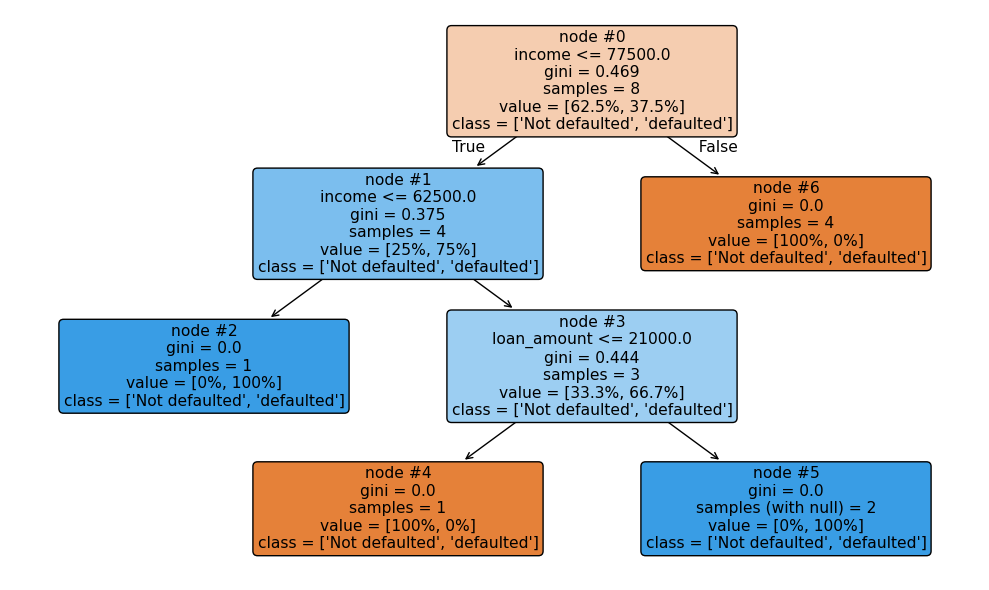

In [19]:
# Plot the trained decision tree using plot_formatted_tree
fig, ax = plot_formatted_tree(
    clf,
    feature_names=X.columns,
    class_names=['Not defaulted', 'defaulted'],
    value_format="percentage",
    samples_format="number",
    figsize=(10, 6),
    display_missing=True,
    X_train=X,
    columns_to_check = ['income']
)

In [20]:
# Example usage:
nulls_in_leaf_nodes = get_nulls_in_leaf_nodes(clf, X, ['income'])

# Display the results
for leaf, details in nulls_in_leaf_nodes.items():
    for col, col_details in details.items():
        print(f"leaf {leaf}, column '{col}': null_count: {col_details['null_count']}")


leaf 5, column 'income': null_count: 2


In [21]:
# Example usage:
nulls_in_leaf_nodes = get_nulls_in_leaf_nodes(clf, X, ['income', 'loan_amount'])

# Display the results
for leaf, details in nulls_in_leaf_nodes.items():
    for col, col_details in details.items():
        print(f"leaf {leaf}, column '{col}': null_count: {col_details['null_count']}")


leaf 5, column 'income': null_count: 2


In [22]:
nulls_in_leaf_nodes

{5: {'income': {'null_count': np.int64(2),
   'sample_indices': [4, 7],
   'total_samples_in_leaf': 3}}}

# Example - summarize tree to table

In [23]:
# Example 1
# Get feature names
feature_names = X.columns.tolist()

# Summarize leaf nodes
leaf_summary_df = summarize_tree(
    clf, feature_names, class_list=['Not defaulted', 'Defaulted'], 
    display_missing=True,
    X_train=X,
    columns_to_check = ['income'])
leaf_summary_df

,leaf_index,income,loan_amount,Missing Value,Sample Size,Not defaulted,Defaulted,Not defaulted%,Defaulted%
0,2,<= 62500,,N,1,0,1,0.0,1.0
1,4,"> 62500, <= 77500",<= 21000,N,1,1,0,1.0,0.0
2,5,"> 62500, <= 77500, Missing",> 21000,Y,2,0,2,0.0,1.0
3,6,> 77500,,N,4,4,0,1.0,0.0


In [24]:
# Example 2
# Load dataset
iris = datasets.load_iris()
X1 = iris.data
y1 = iris.target

# Train a decision tree
clf1 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf1.fit(X1, y1)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [25]:
# Get feature names from iris dataset
feature_names = iris.feature_names

# Summarize leaf nodes
leaf_summary_df = summarize_tree(clf1, feature_names, 
                                   class_list=iris.target_names.tolist(),
                                   display_missing=False,
                                   integer_thresholds=True)
leaf_summary_df

,leaf_index,petal length (cm),petal width (cm),Sample Size,setosa,versicolor,virginica,setosa%,versicolor%,virginica%
0,1,<= 2,,50,50,0,0,1.0,0.000000,0.000000
1,4,"> 2, <= 4",<= 1,48,0,47,1,0.0,0.979167,0.020833
2,5,> 4,<= 1,6,0,2,4,0.0,0.333333,0.666667
3,7,"> 2, <= 4",> 1,3,0,1,2,0.0,0.333333,0.666667
4,8,> 4,> 1,43,0,0,43,0.0,0.000000,1.000000


In [26]:
# Convert text column of features to proper format
leaf_summary_df = convert_text_to_number_column(leaf_summary_df, 'petal length (cm)', min_value=0, max_value=7)

leaf_summary_df

,leaf_index,petal length (cm),petal width (cm),Sample Size,setosa,versicolor,virginica,setosa%,versicolor%,virginica%,petal length (cm)_range
0,1,<= 2,,50,50,0,0,1.0,0.000000,0.000000,0 - 2
1,4,"> 2, <= 4",<= 1,48,0,47,1,0.0,0.979167,0.020833,"3, 4"
2,5,> 4,<= 1,6,0,2,4,0.0,0.333333,0.666667,5 - 7
3,7,"> 2, <= 4",> 1,3,0,1,2,0.0,0.333333,0.666667,"3, 4"
4,8,> 4,> 1,43,0,0,43,0.0,0.000000,1.000000,5 - 7
